In [223]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [224]:
import pathlib
data_dir = pathlib.Path("../dataset_images")

In [225]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

783


In [226]:
batch_size = 32
scale_down = 2
img_width = int(320 / scale_down)
img_height = int(240 / scale_down)

colour_mode = "rgb"

validation_split = 0.2

seed = 123

class_names = [ "value_0", "value_1", "value_2", "value_3", "value_4", "value_5", "value_6", "value_7", "value_8", "value_9", "value_10", "value_11", "value_12", "value_13", "value_14", "value_15", "value_16", "value_17", "value_18", "value_19", "value_20", "value_21", "value_22", "value_23", "value_24", "value_25", "value_26", "value_27", "value_28", "value_29", "value_30", "value_31", "value_32", "value_33", "value_34", "value_35", "value_36", "value_37", "value_38", "value_39"]

In [227]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="training",
  class_names=class_names,
  color_mode=colour_mode,
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 783 files belonging to 40 classes.
Using 627 files for training.


In [228]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="validation",
  class_names=class_names,
  color_mode=colour_mode,
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 783 files belonging to 40 classes.
Using 156 files for validation.


In [229]:
class_names = train_ds.class_names
print(class_names)

['value_0', 'value_1', 'value_10', 'value_11', 'value_12', 'value_13', 'value_14', 'value_15', 'value_16', 'value_17', 'value_18', 'value_19', 'value_2', 'value_20', 'value_21', 'value_22', 'value_23', 'value_24', 'value_25', 'value_26', 'value_27', 'value_28', 'value_29', 'value_3', 'value_30', 'value_31', 'value_32', 'value_33', 'value_34', 'value_35', 'value_36', 'value_37', 'value_38', 'value_39', 'value_4', 'value_5', 'value_6', 'value_7', 'value_8', 'value_9']


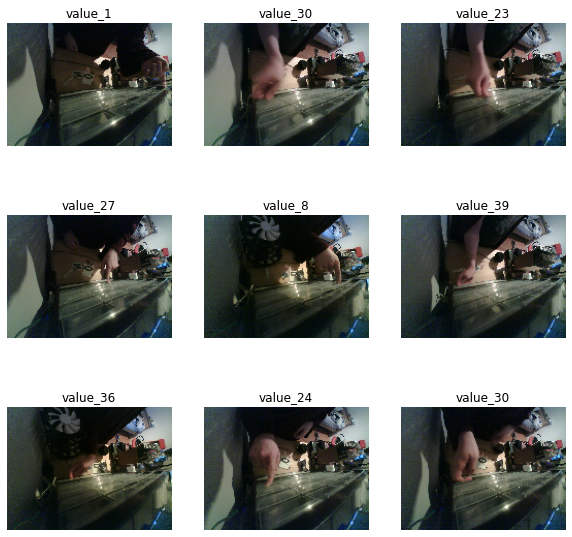

In [230]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [231]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [232]:
num_classes = len(class_names)

factor = 1

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.GaussianNoise(stddev=0.01),
  layers.Conv2D(factor * 2, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(factor * 4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(factor * 8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [233]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [234]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_18 (Rescaling)     (None, 120, 160, 3)       0         
_________________________________________________________________
gaussian_noise_7 (GaussianNo (None, 120, 160, 3)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 120, 160, 2)       56        
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 60, 80, 2)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 60, 80, 4)         76        
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 30, 40, 4)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 30, 40, 8)       

In [235]:
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/40
20/20 [==============================] - 5s 242ms/step - loss: 3.5186 - accuracy: 0.1754 - val_loss: 3.3354 - val_accuracy: 0.2308
Epoch 2/40
20/20 [==============================] - 2s 107ms/step - loss: 3.3592 - accuracy: 0.1834 - val_loss: 3.2451 - val_accuracy: 0.2308
Epoch 3/40
20/20 [==============================] - 3s 132ms/step - loss: 3.2117 - accuracy: 0.1850 - val_loss: 3.1062 - val_accuracy: 0.2500
Epoch 4/40
20/20 [==============================] - 2s 118ms/step - loss: 3.0184 - accuracy: 0.2057 - val_loss: 2.9488 - val_accuracy: 0.2500
Epoch 5/40
20/20 [==============================] - 2s 112ms/step - loss: 2.8073 - accuracy: 0.2903 - val_loss: 2.7012 - val_accuracy: 0.2821
Epoch 6/40
20/20 [==============================] - 2s 124ms/step - loss: 2.4096 - accuracy: 0.3477 - val_loss: 2.4103 - val_accuracy: 0.3654
Epoch 7/40
20/20 [==============================] - 3s 140ms/step - loss: 2.0610 - accuracy: 0.4179 - val_loss: 2.0830 - val_accuracy: 0.3718
Epoch 

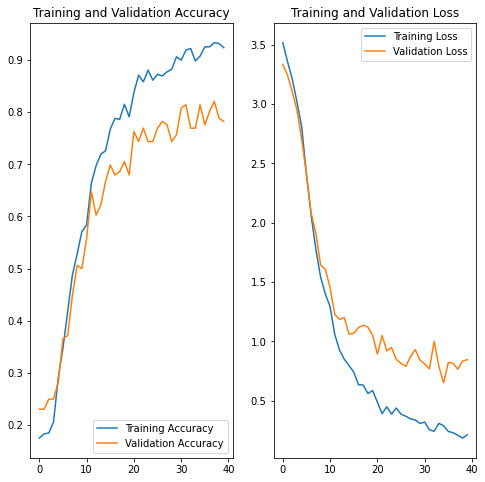

In [236]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [237]:
from tinymlgen import port
c_code = port(model, pretty_print=True, optimize=True)
print(c_code)

 0x00, 
	0x18, 0x00, 0x07, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 
	0x0e, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x01, 0x02, 0x00, 0x00, 0x00, 
	0x02, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00, 
	0x01, 0x00, 0x00, 0x00, 0x11, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 
	0x10, 0x00, 0x00, 0x00, 0xb2, 0xff, 0xff, 0xff, 0x00, 0x00, 0x00, 0x01, 
	0x02, 0x00, 0x00, 0x00, 0x30, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 
	0x10, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x00, 0x00, 0x08, 0x00, 
	0x0c, 0x00, 0x07, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x01, 
	0x01, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 
	0x10, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 
	0x0b, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0e, 0x00, 
	0x18, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x07, 0x00, 0x14, 0x00, 
	0x0e, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0b, 0x01, 0x00, 0x00, 0x00, 
	0x18, 0x00, 0x00, 0x00, 0x0c,

In [238]:
src_dir = pathlib.Path("../src")
model_file = open(src_dir / "model.h", "w")
model_file.write(c_code)
model_file.close()